# <center>Introduction to Pandas</center>

![](https://pandas.pydata.org/_static/pandas_logo.png)


## Installation

Simply,
```
pip install pandas
```


## Reading data from a CSV file

You can read data from a CSV file using the ``read_csv`` function. By default, it assumes that the fields are comma-separated.

In [3]:
# import pandas
import pandas as pd

>The `imdb.csv` dataset contains Highest Rated IMDb "Top 1000" Titles.

In [11]:
# load imdb dataset as pandas dataframe
imdb_df = pd.read_csv('imdb_1000.csv')

In [12]:
# show first 5 rows of imdb_df
print(imdb_df.head(5))

   star_rating                     title content_rating   genre  duration  \
0          9.3  The Shawshank Redemption              R   Crime       142   
1          9.2             The Godfather              R   Crime       175   
2          9.1    The Godfather: Part II              R   Crime       200   
3          9.0           The Dark Knight          PG-13  Action       152   
4          8.9              Pulp Fiction              R   Crime       154   

                                         actors_list  
0  [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...  
1    [u'Marlon Brando', u'Al Pacino', u'James Caan']  
2  [u'Al Pacino', u'Robert De Niro', u'Robert Duv...  
3  [u'Christian Bale', u'Heath Ledger', u'Aaron E...  
4  [u'John Travolta', u'Uma Thurman', u'Samuel L....  


>The `bikes.csv` dataset contains information about the number of bicycles that used certain bicycle lanes in Montreal in the year 2012.

In [118]:
# load bikes dataset as pandas dataframe
bike_df = pd.read_csv('bikes.csv',delimiter=';')

In [119]:
# show first 3 rows of bikes_df
print(bike_df.head(3))
print(bike_df.columns)

         Date Unnamed: 1  Rachel / Papineau  Berri1  Maisonneuve_2  \
0  01/01/2012      00:00                 16      35             51   
1  02/01/2012      00:00                 43      83            153   
2  03/01/2012      00:00                 58     135            248   

   Maisonneuve_1  Brébeuf  Parc  PierDup  CSC (Côte Sainte-Catherine)  \
0             38      5.0    26       10                            0   
1             68     11.0    53        6                            1   
2            104      2.0    89        3                            2   

   Pont_Jacques_Cartier  
0                  27.0  
1                  21.0  
2                  15.0  
Index(['Date', 'Unnamed: 1', 'Rachel / Papineau', 'Berri1', 'Maisonneuve_2',
       'Maisonneuve_1', 'Brébeuf', 'Parc', 'PierDup',
       'CSC (Côte Sainte-Catherine)', 'Pont_Jacques_Cartier'],
      dtype='object')


## Selecting columns

When you read a CSV, you get a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

In [15]:
# list columns of imdb_df
print(imdb_df.columns)

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')


In [17]:
# what are the datatypes of values in columns
print(imdb_df.dtypes)

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object


In [20]:
# list first 5 movie titles
imdb_df['title'].head()

0    The Shawshank Redemption
1               The Godfather
2      The Godfather: Part II
3             The Dark Knight
4                Pulp Fiction
Name: title, dtype: object

In [21]:
# show only movie title and genre
imdb_df[['title','genre']]

,title,genre
0,The Shawshank Redemption,Crime
1,The Godfather,Crime
2,The Godfather: Part II,Crime
3,The Dark Knight,Action
4,Pulp Fiction,Crime
...,...,...
974,Tootsie,Comedy
975,Back to the Future Part III,Adventure
976,Master and Commander: The Far Side of the World,Action
977,Poltergeist,Horror


## Understanding columns

On the inside, the type of a column is ``pd.Series`` and pandas Series are internally numpy arrays. If you add ``.values`` to the end of any Series, you'll get its internal **numpy array**.

In [24]:
# show the type of duration column
print(imdb_df['duration'].dtype)

int64


In [27]:
# show duration values of movies as numpy arrays
duration_values = imdb_df['duration'].to_numpy()
print(duration_values)
#OR 2nd way 
#import numpy as np
#duration_values = np.array(imdb_df['duration'])
#print(duration_value)

[142 175 200 152 154  96 161 201 195 139 178 148 124 142 179 169 133 207
 146 121 136 130 130 106 127 116 175 118 110  87 125 112 102 107 119  87
 169 115 112 109 189 110 150 165 155 137 113 165  95 151 155 153 125 130
 116  89 137 117  88 165 170  89 146  99  98 116 156 122 149 134 122 136
 157 123 119 137 128 120 229 107 134 103 177 129 102 216 136  93  68 189
  99 108 113 181 103 138 110 129  88 160 126  91 116 125 143  93 102 132
 153 183 160 120 138 140 153 170 129  81 127 131 172 115 108 107 129 156
  96  91  95 162 130  86 186 151  96 170 118 161 131 126 131 129 224 180
 105 117 140 119 124 130 139 107 132 117 126 122 178 238 149 172  98 116
 116 123 148 123 182  92  93 100 135 105  94 140  83  95  98 143  99  98
 121 163 121 167 188 121 109 110 129 127  94 107 100 117 129 120 121 133
 111 122 101 134 165 138 212 154  89 134  93 114  88 130 101 158  99 108
 124 132 113 131 191 167 130 147 102  88 165 132 118 101 108 174  98  92
  98 106  85 101 105 115 115 124 105 103 138 184 12

## Applying functions to columns

Use `.apply` function to apply any function to each element of a column.

In [28]:
# convert all the movie titles to uppercase
imdb_df['title'] = imdb_df['title'].str.upper()
print(imdb_df['title'].head())

0    THE SHAWSHANK REDEMPTION
1               THE GODFATHER
2      THE GODFATHER: PART II
3             THE DARK KNIGHT
4                PULP FICTION
Name: title, dtype: object


## Plotting a column

Use ``.plot()`` function!

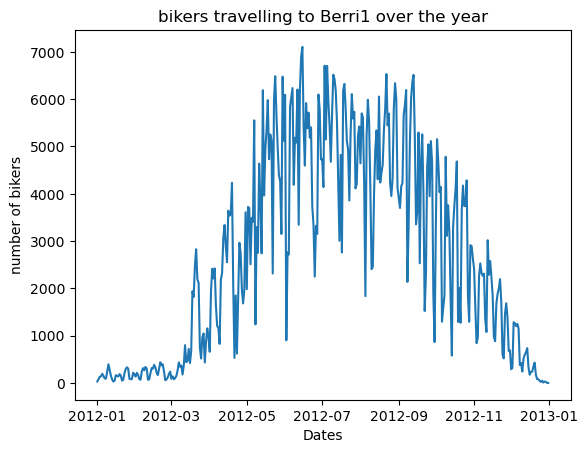

In [51]:
# plot the bikers travelling to Berri1 over the year
import matplotlib.pyplot as plt
bike_df['Date'] = pd.to_datetime(bike_df['Date'], format='%d/%m/%Y')
x = bike_df['Date'].to_numpy()
y = bike_df['Berri1'].to_numpy()
plt.plot(x,y)
plt.title('bikers travelling to Berri1 over the year')
plt.xlabel('Dates')
plt.ylabel('number of bikers')
plt.show()

<Axes: xlabel='Date'>

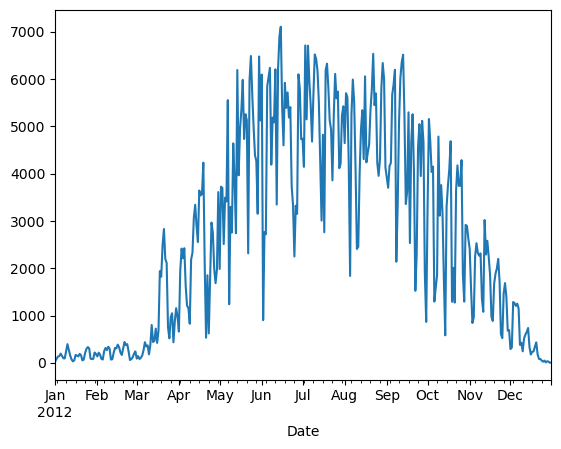

In [59]:
bike_df['Berri1'].plot()

<Axes: xlabel='Date'>

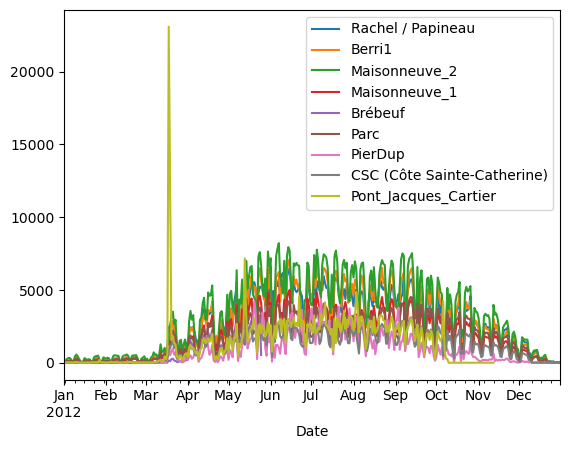

In [58]:
# plot all the columns of bikes_df
bike_df.plot()

## Value counts

Get count of unique values in a particular column/Series.

In [63]:
# what are the unique genre in imdb_df?
#print(imdb_df.columns)
unique_genre = imdb_df['genre'].unique()
print(unique_genre)

['Crime' 'Action' 'Drama' 'Western' 'Adventure' 'Biography' 'Comedy'
 'Animation' 'Mystery' 'Horror' 'Film-Noir' 'Sci-Fi' 'History' 'Thriller'
 'Family' 'Fantasy']


<Axes: xlabel='genre'>

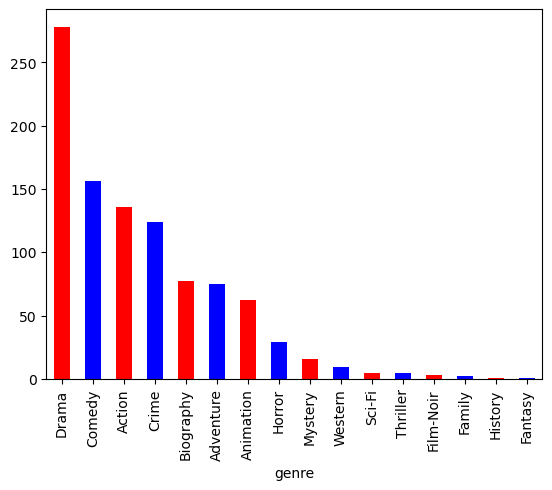

In [71]:
# plotting value counts of unique genres as a bar chart
imdb_df['genre'].value_counts().plot(kind='bar',color=('red','blue')) 

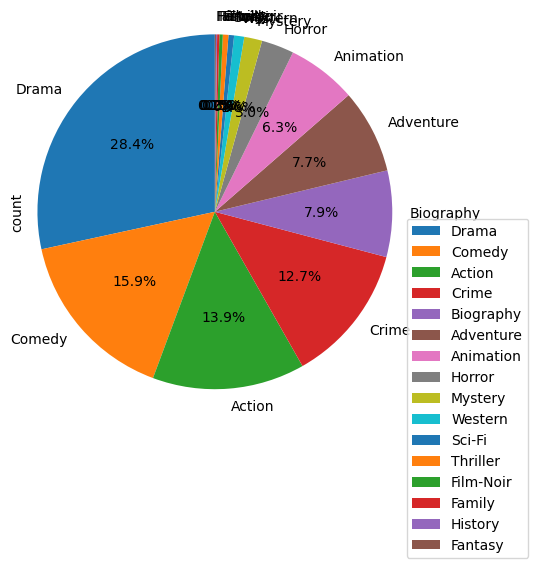

In [85]:
# plotting value counts of unique genres as a pie chart
imdb_df['genre'].value_counts().plot(kind='pie',startangle=90,radius=1.2,autopct='%1.1f%%')

plt.legend(imdb_df['genre'].value_counts().index, loc="best", bbox_to_anchor=(1, 0.5), fontsize=10)


## Index

### DATAFRAME = COLUMNS + INDEX + ND DATA

### SERIES = INDEX + 1-D DATA

**Index** or (**row labels**) is one of the fundamental data structure of pandas. It can be thought of as an **immutable array** and an **ordered set**.

> Every row is uniquely identified by its index value.

In [88]:
# show index of bikes_df

print(bike_df.index)


DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)


In [91]:
# get row for date 2012-01-01
bike_df.loc['2012-01-01']

Unnamed: 1                     00:00
Rachel / Papineau                 16
Berri1                            35
Maisonneuve_2                     51
Maisonneuve_1                     38
Brébeuf                          5.0
Parc                              26
PierDup                           10
CSC (Côte Sainte-Catherine)        0
Pont_Jacques_Cartier            27.0
Name: 2012-01-01 00:00:00, dtype: object

#### To get row by integer index:

Use ``.iloc[]`` for purely integer-location based indexing for selection by position.

In [95]:
# show 11th row of imdb_df using iloc
imdb_df.iloc[10]

star_rating                                                     8.8
title             THE LORD OF THE RINGS: THE FELLOWSHIP OF THE RING
content_rating                                                PG-13
genre                                                     Adventure
duration                                                        178
actors_list       [u'Elijah Wood', u'Ian McKellen', u'Orlando Bl...
Name: 10, dtype: object

## Selecting rows where column has a particular value

In [107]:
# select only those movies where genre is adventure
adventure = imdb_df[imdb_df['genre'].str.contains('Adventure')]
print(adventure)

     star_rating                                              title  \
7            8.9      THE LORD OF THE RINGS: THE RETURN OF THE KING   
10           8.8  THE LORD OF THE RINGS: THE FELLOWSHIP OF THE RING   
14           8.8              THE LORD OF THE RINGS: THE TWO TOWERS   
15           8.7                                       INTERSTELLAR   
54           8.5                                 BACK TO THE FUTURE   
..           ...                                                ...   
936          7.4                                          TRUE GRIT   
937          7.4                                          LABYRINTH   
943          7.4                                    THE BUCKET LIST   
953          7.4                              THE NEVERENDING STORY   
975          7.4                        BACK TO THE FUTURE PART III   

    content_rating      genre  duration  \
7            PG-13  Adventure       201   
10           PG-13  Adventure       178   
14           PG-13

In [112]:
# which genre has highest number of movies with star rating above 8 and duration more than 130 minutes?
imdb_df[(imdb_df['star_rating'] > 8) & (imdb_df['duration']>130)]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,THE SHAWSHANK REDEMPTION,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,THE GODFATHER,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,THE GODFATHER: PART II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,THE DARK KNIGHT,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,PULP FICTION,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
273,8.1,PAPILLON,R,Biography,151,"[u'Steve McQueen', u'Dustin Hoffman', u'Victor..."
288,8.1,SLING BLADE,R,Drama,135,"[u'Billy Bob Thornton', u'Dwight Yoakam', u'J...."
289,8.1,ALL QUIET ON THE WESTERN FRONT,UNRATED,Drama,136,"[u'Lew Ayres', u'Louis Wolheim', u'John Wray']"
290,8.1,PRISONERS,R,Crime,153,"[u'Hugh Jackman', u'Jake Gyllenhaal', u'Viola ..."


## Adding a new column to DataFrame

In [128]:
# add a weekday column to bikes_df
# print(bike_df.columns)
# bike_df['Date'] = pd.to_datetime(bike_df['Date'],format='%d/%m/%Y')
bike_df['weekday']=bike_df['Date'].dt.day_name()
print(bike_df.head())

        Date Unnamed: 1  Rachel / Papineau  Berri1  Maisonneuve_2  \
0 2012-01-01      00:00                 16      35             51   
1 2012-01-02      00:00                 43      83            153   
2 2012-01-03      00:00                 58     135            248   
3 2012-01-04      00:00                 61     144            318   
4 2012-01-05      00:00                 95     197            330   

   Maisonneuve_1  Brébeuf  Parc  PierDup  CSC (Côte Sainte-Catherine)  \
0             38      5.0    26       10                            0   
1             68     11.0    53        6                            1   
2            104      2.0    89        3                            2   
3            116      2.0   111        8                            1   
4            124      6.0    97       13                            2   

   Pont_Jacques_Cartier    weekday  
0                  27.0     Sunday  
1                  21.0     Monday  
2                  15.0    Tuesday 

## Deleting an existing column from DataFrame

In [132]:
# remove column 'Unnamed: 1' from bikes_df
bike_df.drop('Unnamed: 1',axis = 1,inplace=True)


KeyError: "['Unnamed: 1'] not found in axis"

In [133]:
# remove column 'Unnamed: 1' from bikes_df
bike_df


,Date,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,weekday
0,2012-01-01,16,35,51,38,5.0,26,10,0,27.0,Sunday
1,2012-01-02,43,83,153,68,11.0,53,6,1,21.0,Monday
2,2012-01-03,58,135,248,104,2.0,89,3,2,15.0,Tuesday
3,2012-01-04,61,144,318,116,2.0,111,8,1,19.0,Wednesday
4,2012-01-05,95,197,330,124,6.0,97,13,2,16.0,Thursday
...,...,...,...,...,...,...,...,...,...,...,...
361,2012-12-27,8,12,7,4,NaN,1,2,0,NaN,Thursday
362,2012-12-28,0,35,3,38,NaN,0,0,0,NaN,Friday
363,2012-12-29,0,27,8,42,NaN,9,0,0,NaN,Saturday
364,2012-12-30,0,5,1,5,NaN,6,0,0,NaN,Sunday


## Deleting a row in DataFrame

In [138]:
# remove row no. 1 from bikes_df
bike_df.drop(1,axis=0,inplace=True)

In [139]:
# remove row no. 1 from bikes_df
bike_df

,Date,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,weekday
0,2012-01-01,16,35,51,38,5.0,26,10,0,27.0,Sunday
2,2012-01-03,58,135,248,104,2.0,89,3,2,15.0,Tuesday
3,2012-01-04,61,144,318,116,2.0,111,8,1,19.0,Wednesday
4,2012-01-05,95,197,330,124,6.0,97,13,2,16.0,Thursday
5,2012-01-06,75,146,244,98,4.0,86,4,0,17.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...
361,2012-12-27,8,12,7,4,NaN,1,2,0,NaN,Thursday
362,2012-12-28,0,35,3,38,NaN,0,0,0,NaN,Friday
363,2012-12-29,0,27,8,42,NaN,9,0,0,NaN,Saturday
364,2012-12-30,0,5,1,5,NaN,6,0,0,NaN,Sunday


## Group By

Any groupby operation involves one of the following operations on the original object. They are −

- Splitting the Object

- Applying a function

- Combining the results

In many situations, we split the data into sets and we apply some functionality on each subset. In the apply functionality, we can perform the following operations −

- **Aggregation** − computing a summary statistic

- **Transformation** − perform some group-specific operation

- **Filtration** − discarding the data with some condition

In [144]:
# group imdb_df by movie genres
grouped_by_genre = imdb_df.groupby('genre')
print(grouped_by_genre)

In [148]:
# get crime movies group
crime_movies = imdb_df[imdb_df['genre'].str.contains('Crime')]
print(crime_movies)

     star_rating                     title content_rating  genre  duration  \
0            9.3  THE SHAWSHANK REDEMPTION              R  Crime       142   
1            9.2             THE GODFATHER              R  Crime       175   
2            9.1    THE GODFATHER: PART II              R  Crime       200   
4            8.9              PULP FICTION              R  Crime       154   
21           8.7               CITY OF GOD              R  Crime       130   
..           ...                       ...            ...    ...       ...   
927          7.5                     BRICK              R  Crime       110   
931          7.4              MEAN STREETS              R  Crime       112   
950          7.4                     BOUND              R  Crime       108   
969          7.4       LAW ABIDING CITIZEN              R  Crime       109   
978          7.4               WALL STREET              R  Crime       126   

                                           actors_list  
0    [

In [151]:
# get mean of movie durations for each group
mean_duration=grouped_by_genre['duration'].mean()
print(mean_duration)

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64


In [153]:
# change duration of all movies in a particular genre to mean duration of the group
mean_by_genre = imdb_df.groupby('genre')['duration'].mean()

In [161]:
# drop groups/genres that do not have average movie duration greater than 120.
genres_to_keep = mean_by_genre[mean_by_genre>120]
print(genres_to_keep)

genre
Action       126.485294
Adventure    134.840000
Biography    131.844156
Crime        122.298387
Drama        126.539568
Western      136.666667
Name: duration, dtype: float64


In [154]:
# group weekday wise bikers count
group_weekday_wise = bike_df.groupby('weekday')

In [156]:
# get weekday wise biker count
group_weekday_wise_count = bike_df.groupby('weekday').count()
print(group_weekday_wise_count)

           Date  Rachel / Papineau  Berri1  Maisonneuve_2  Maisonneuve_1  \
weekday                                                                    
Friday       52                 52      52             52             52   
Monday       52                 52      52             52             52   
Saturday     52                 52      52             52             52   
Sunday       53                 53      53             53             53   
Thursday     52                 52      52             52             52   
Tuesday      52                 52      52             52             52   
Wednesday    52                 52      52             52             52   

           Brébeuf  Parc  PierDup  CSC (Côte Sainte-Catherine)  \
weekday                                                          
Friday          21    52       52                           52   
Monday          20    52       52                           52   
Saturday        20    52       52                  

Text(0, 0.5, 'Number of Bikers')

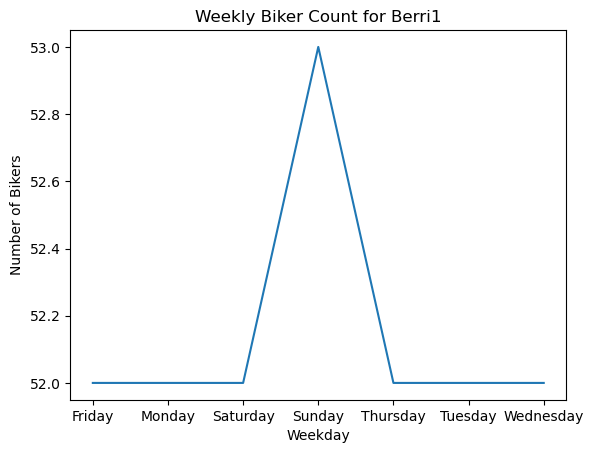

In [159]:
# plot weekday wise biker count for 'Berri1'
group_weekday_wise_count_Berri1 = bike_df.groupby('weekday')['Berri1'].count()
group_weekday_wise_count_Berri1.plot()
plt.title('Weekly Biker Count for Berri1')
plt.xlabel('Weekday')
plt.ylabel('Number of Bikers')

![](https://memegenerator.net/img/instances/500x/73988569/pythonpandas-is-easy-import-and-go.jpg)